<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Introducción al Aprendizaje Automático</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el tercer práctico del proyecto, correspondiente a la materia Introducción al Aprendizaje Automático. El objetivo consiste en explorar la aplicación de diferentes métodos de aprendizaje supervisado aprendidos en el curso, a través de experimentos reproducibles, y evaluando a su vez la conveniencia de uno u otro, así como la selección de diferentes hiperparámetros a partir del cálculo de las métricas pertinentes.

En el caso de nuestro proyecto, nos enfrentamos originalmente a un problema de clasificación múltiple con datos etiquetados. Sin embargo, a los fines de este práctico, lo transformaremos en un problema de clasificación binario, adaptando las etiquetas del dataset. Además, será importante evaluar el desbalance de clases y qué decisiones tomaremos al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Perceptron, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from ml.visualization import plot_confusion_matrix, classifier_boundary


np.random.seed(0)  # Para mayor determinismo

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Introducción al Aprendizaje Automático

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes.La división entre train y test será realizada en este mismo práctico.
A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, luego de haber unido ambos datasets, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el práctico anterior.
En esta etapa, pueden adicionar los atributos que crean pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, la que crearon de aparatos tecnológicos.

#### 3. Dataset para Problema de Clasificación Binario

Si bien nuestro problema original es uno de clasificación múltiple, comenzaremos por tratarlo como un problema de clasificación binario, en donde nuestro objetivo será:
    
    1 = Corresponde a un hogar vulnerable o pobre (Target != 4)
    0 = Corresponde a un hogar no vulnerable (Target == 4)

Es decir, queremos identificar los hogares vulnerables o en situación de pobreza, ya sea moderada o extrema.
En base a esta definición, deben transformar el dataset para adaptarlo a un problema de clasifiación binario.

¿Cómo luce ahora el balance de clases? ¿Tomarán alguna decisión al respecto?

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies; ¿qué ocurre con la correlación entre ellas? Hacer la siguiente prueba: Tomar un set de dummies correspondientes a la misma categoría, crear una nueva variable como la suma de k-1 de ellas y obtener la correlación de esta nueva variable con la dummy k-ésima.

Luego, responder: ¿Qué implicancia tiene esto en modelos lineales? ¿Cómo se puede solucionar? ¿Qué decisión tomarían al respecto?

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Transformar el dataset como se describe en el punto a y guardarlo en una nueva variable. Del siguiente punto en adelante, deberán resolver para los dos datasets, el nuevo y el original.

#### 6. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que muchos de los algoritmos de clasificación supervisada lo requieren. ¿En qué casos tendrá que implementarse normalización?

Aplicar a los datasets la normalización de atributos que consideren adecuada.

#### 7. Mezca Aleatória y División en Train/Test

Finalmente, están en condiciones de **dividir el dataset en Train y Test**, utilizando para este último conjunto un 20% de los datos disponibles. Previo a esta división, es recomendable que mezclen los datos aleatoriamente.
De este modo, deberán obtener cuatro conjuntos de datos, para cada uno de los datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Clasificación

Una vez finalizada la etapa de preprocesamiento, se propone implementar diferentes modelos de clasificación **para ambos datasets**, utilizando la librería Scikit-Learn:

1. Perceptron. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)
2. K Nearest Neighbors ó K Vecinos Más Cercanos
3. Regresión Logística. Utilizar el método Stochastic Gradient Descent (Recuerden mezclar aleatoriamente los datos antes de cada iteración)

Para cada uno de ellos, se pide responder las siguientes consignas:
- Utilizar dos features para graficar las clases y la frontera de decisión, siempre que sea posible.
- Agregar vector de Bias, cuando lo crean pertinente. Cuándo hace falta y cuándo no? Por qué?
- Obtener accuracy o exactitud.

De estos tres tipos de modelos, cuál creen que es el más adecuado para nuestro caso de aplicación?

**Elegir el modelo que consideren que mejor aplica a nuestro problema.** Para ello, recuerden que los pasos a seguir en la selección pueden esquematizarse como sigue:

#### 1. Descripción de la Hipótesis

¿Cuál es nuestro problema? ¿Cómo se caracteriza? ¿Cuál es la hipótesis?

#### 2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4. Justificación de las Selecciones

¿Por qué eligieron el modelo, el regularizador y la función de costo previas?

Finalmente, para el modelo selecionado:

- Utilizar el método *Grid Search*, o de búsqueda exahustiva, con *cross-validation* para profundizar en la búsqueda y selección de hiperparámetros.
- Calcular métricas sobre el conjunto de entrenamiento y de evaluación para los mejores parámetros obtenidos:
    + Accuracy o exactitud
    + Reporte de clasificación
    + Confusion matrix o matriz de confusión (graficar como heatmap)
    + Curva ROC y área bajo la curva (AUC).

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y los modelos implementados, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [3]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://raw.githubusercontent.com/solujan/DiploDatos2019/master/ProyectoPobrezaCostaRica/Dataset%20Fields.csv'
_data_fields = pd.read_csv(url_fields_info, sep=';')
_data_fields

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household
5,refrig,=1 if the household has refrigerator
6,v18q,owns a tablet
7,v18q1,number of tablets household owns
8,r4h1,Males younger than 12 years of age
9,r4h2,Males 12 years of age and older


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

In [13]:
# Eliminamos columnas que son features calculadas en base a otras features
#_calc_feat = _ds.loc[:,'SQBescolari':'agesq'].columns
#print('Columnas eliminadas: ', _calc_feat.values)
#_ds.drop(columns = _calc_feat, inplace = True)

<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [14]:
from clean import clean
ds = clean(_ds)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']
Cantidad de familias sin caracteristicas comunes:  19
Cantidad de familias sin caracteristicas comunes:  4
Total Features:  2 objetos + 122 numerical = 124 features


### 3. Dataset para Problema de Clasificación Binario

En esta instancia deberán transformar la variable ```Target```, de modo que:
    
    1 = Corresponde a un hogar vulnerable o pobre (Target != 4)
    0 = Corresponde a un hogar no vulnerable (Target == 4)
    
Luego, evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

In [15]:
ds.Target = ds.Target != 4
ds.Target = ds.Target.apply(lambda x: int(x))

In [16]:
porcentaje_1 = ds.Target.value_counts()[0] / ds.Target.shape[0] * 100
print(f"Aqui podemos observar que la clase 0 tiene el {porcentaje_1}% de los datos siendo mucho "+
      f"más grande que los elementos agrupados en la clase 1")

Aqui podemos observar que la clase 0 tiene el 62.70275963766589% de los datos siendo mucho más grande que los elementos agrupados en la clase 1


In [17]:
y = ds.Target
X = ds[['costo_oportunidad']]
model = LogisticRegression().fit(X, y)
pred_y = model.predict(X)
print(np.unique( pred_y ) )
print(f"Aqui probamos un modelo lineal que solamente predice la clase 0 y "
      f"ya con eso tenemos una accuraccy de {accuracy_score(pred_y, y)*100} %"
     "\n Esta prueba se hace con al finalidad de ver que aunque un modelo sea muy malo pues va a tener un nivel de acertación de 62%")

[0]
Aqui probamos un modelo lineal que solamente predice la clase 0 y ya con eso tenemos una accuraccy de 62.70275963766589 %
 Esta prueba se hace con al finalidad de ver que aunque un modelo sea muy malo pues va a tener un nivel de acertación de 62%


/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### 3.1 Remuestreo a la clase más pequeña

Lo primero que vamos a hacer es probar con el remuestreo (resample), lo que vamos a hacer es agrandar la clase que vemos que tiene menos valores para que se parezca en tamaño a la otra clase. 

In [18]:
ds_majority = ds[ds.Target==0]
ds_minority = ds[ds.Target==1]
 
ds_minority_upsampled = resample(ds_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=ds_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results
 
ds_upsampled = pd.concat([ds_majority, ds_minority_upsampled])
 
# Mostramos de nuevos la cantida de elementos por clase
ds_upsampled.Target.value_counts()

1    5953
0    5953
Name: Target, dtype: int64

In [19]:
y = ds_upsampled.Target
X = ds_upsampled[['costo_oportunidad']]
 
clf_1 = LogisticRegression().fit(X, y)
pred_y_1 = clf_1.predict(X)
 
print( np.unique( pred_y_1 ) )
print( accuracy_score(y, pred_y_1) )

[0]
0.5


/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Aqui ya vemos que "balanceamos" las clases y un modelo que solo predice una variable al menos solo va a predecir la mitad

#### 3.2 Reducimos el numero de elementos de la clase más grande
Vamos a probar a reducir el numero de muestras que tiene la clase más grande de manera aleatoria a ver que tal se comportan ahora los modelos. Y para igualar las oportunidad entre ambos

In [20]:
ds_majority = ds[ds.Target==0]
ds_minority = ds[ds.Target==1]
 
# Downsample majority class
ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,
                                 n_samples=ds_minority.shape[0],
                                 random_state=123) 
 
ds_downsampled = pd.concat([ds_majority_downsampled, ds_minority])
ds_downsampled.Target.value_counts()


1    3541
0    3541
Name: Target, dtype: int64

In [21]:
y = ds_downsampled.Target
X = ds_downsampled[['costo_oportunidad']]
 
clf_2 = LogisticRegression().fit(X, y)
pred_y_2 = clf_2.predict(X)
 
print( np.unique( pred_y_2 ) )
print( accuracy_score(y, pred_y_2) )


/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]
0.5


#### 3.3 Conclusión
La clase más pequeñas entre ambas clases no es demasiado pequeña como puede ocurrir en otros casos y recrear nuevos valores en unas clases donde la información esta muy ligada a la familia como conjunto puede llevar a la presencia de datos erroneos, Por lo cual mi opinion es que la mejor opción es quedarnos con el dataset reducido en el paso 3.2

In [22]:
ds_individuo = ds_downsampled

### 4. Multicolinealidad Exacta y Variables Dummies

¿Qué ocurre con la correlación entre las variables dummies de una misma categoría?
En este paso, deberán desarrollar la siguiente prueba: Tomar un conjunto de dummies correspondientes a la misma categoría, crear una nueva variable como la suma de k-1 de ellas y obtener la correlación de esta nueva variable con la dummy k-ésima.

Luego, responder: ¿Qué implicancia tiene esto en modelos lineales? ¿Cómo se puede solucionar?

In [23]:
#Este esta bien pero la idea era chequear por variable
ds["multicolinealidad"] = ds.epared1 + ds.epared2 + ds.etecho1 + ds.etecho2 + ds.eviv1 + ds.eviv2
corr = ds[["multicolinealidad", "epared3", "etecho3", "eviv3"]].corr()
corr.multicolinealidad.sort_values()
#Es evidente que hay multicolinealidad, entre estas tres variables que probamos.

epared3             -0.890055
etecho3             -0.875506
eviv3               -0.862546
multicolinealidad    1.000000
Name: multicolinealidad, dtype: float64

In [24]:
ds["multicolinealidad"] = ds.epared1 + ds.epared2 
corr = ds[["multicolinealidad", "epared3"]].corr()
corr.multicolinealidad.sort_values()

epared3             -1.0
multicolinealidad    1.0
Name: multicolinealidad, dtype: float64

Es evidente que hay multicolinealidad, entre estas tres variables que probamos. 

*¿Qué implicancia tiene esto en modelos lineales?*
El problema es que esto les añade mayor inestabilidad a nuestros valores porque los fuerzan más hacia un mismo lado, lo cual hace que nos de valores más sesgados.


¿Cómo solucionamos esto? 

Regresión Ridge: Mecanicamente se reduce la interrelacion de las variables agregando una constante cualquiera a las varianzas de dichas variables.

Eliminar predictores altamente correlacionados del modelo. Si tiene dos o más factores altamente correlacionados, elimine uno del modelo

Analisis de componentes principales

In [69]:
pcs_dataset = ds.select_dtypes(include=['int64','float64'])
pcs_dataset.drop(columns = ["monthly_rent"], inplace = True)
print(pcs_dataset.columns)
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(pcs_dataset)
principalDf = pd.DataFrame(data = principalComponents)

Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1', 'r4h1',
       'r4h2', 'r4m1',
       ...
       'region_brunca', 'region_huetar_atlantica', 'region_huetar_norte',
       'zona_urbana', 'zona_rural', 'age', 'Target', 'costo_oportunidad',
       'rent', 'multicolinealidad'],
      dtype='object', length=122)


/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [151]:
#Elimino las columas del dataset para eviar la multicolinealidad
#HIce la prueba y al menos los modelos bajaon en accuracy, igual probar de nuevo
#ds.drop(["epared3", "sanitario6",  "etecho3", "eviv3", "energcocinar4", "elimbasu6"], axis=1, inplace=True)

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, deberán crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [26]:
ds_hogar = ds[ds['parentesco1'] == 1]
ds_hogar.head()

,Id,monthly_rent,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4m1,r4m2,tamhog,tamviv,escolari,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,region_central,region_chorotega,region_pacifico_central,region_brunca,region_huetar_atlantica,region_huetar_norte,zona_urbana,zona_rural,age,Target,costo_oportunidad,rent,multicolinealidad
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,0,0,1,1,10,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,0,190000.000000,1,1
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,0,0,1,1,12,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,0,135000.000000,1,1
2,ID_68de51c94,NaN,0,8,0,1,1,0,0.0,0,0,0,1,1,1,11,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,0,328862.222222,0,1
5,ID_ec05b1a7b,180000.0,0,5,0,1,1,1,1.0,0,2,1,1,4,4,11,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,38,0,180000.000000,1,0
8,ID_1284f8aad,130000.0,1,2,0,1,1,0,0.0,0,1,2,1,4,4,9,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,d6dae86b7,2,2,0,0,0,0,1,0,0,0,0,0,1,4.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,30,0,130000.000000,1,1


In [29]:
ds_majority = ds_hogar[ds_hogar.Target==0]
ds_minority = ds_hogar[ds_hogar.Target==1]
 
# Downsample majority class
ds_majority_downsampled = resample(ds_majority, 
                                 replace=False,
                                 n_samples=ds_minority.shape[0],
                                 random_state=123) 
 
ds_hogar = pd.concat([ds_majority_downsampled, ds_minority])
ds_hogar.Target.value_counts()

1    1019
0    1019
Name: Target, dtype: int64

### 6. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

In [33]:
# Pueden utilizar los siguientes métodos, por ejemplo:

min_max_scaler = preprocessing.MinMaxScaler()
standard_scaler = preprocessing.StandardScaler()

# "v2a1" "r4m3" "r4t2", "r4t3" "r4t1", "r4h3",
min_max_columns = ["age", "rooms", "bedrooms", "r4h1", 
                   "r4h2",  "r4m1", "r4m2", 
                    "tamhog", "tamviv", "escolari"]

ds_individuo[min_max_columns] = min_max_scaler.fit_transform(ds_individuo[min_max_columns])
ds_hogar[min_max_columns] = min_max_scaler.fit_transform(ds_hogar[min_max_columns])

ds_individuo.costo_oportunidad = ds_individuo.costo_oportunidad.apply(lambda x: np.log(x), xaxis=1)
ds_hogar.costo_oportunidad = ds_hogar.costo_oportunidad.apply(lambda x: np.log(x), xaxis=1)

#standard_scaler.fit_transform(ds[["zona_rural","zona_urbana"]])
#preguntarle a juli porque al usar standar scaler no los pone como -1 y 1.
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [5]:
sns.kdeplot(ds.age)


NameError: name 'ds' is not defined

### 7. Mezca Aleatória y División en Train/Test

Primeramente, deberán mezclar los datos aleatoriamente. Luego, para dividir en Train/Test el dataset, aplicar el split utilizando un 20% de datos para este último.

En este punto, deberán obtener cuatro conjuntos de datos, para ambos datasets: ```X_train```, ```X_test```, ```y_train``` y ```y_test```.

In [35]:
# Para dividir el dataset, utilizar el siguiente módulo:
ds_shuff = shuffle(ds_individuo)
y = ds_shuff.Target
ds_shuff.drop(columns=["Id","monthly_rent","idhogar", "Target"], inplace=True)
X = ds_shuff
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Notar que X e y son np.arrays. Además, pueden usar el parámetro que incluye train_test_split para mezclar.

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [36]:
print(X_train.shape)
print(X_test.shape)

(5665, 120)
(1417, 120)


## II. Aplicación de Modelos de Clasificación

Utilizando los datos de train y test obtenidos, se aplicarán diferentes modelos de clasificación para los dos datasets, `_ds_individuo` y `_ds_hogar`.

### II.A. Dataset Nivel Individuo

### 1. Perceptron

A continuación se aplicará un clasificador Perceptrón.

In [37]:
# En principio, pueden utilizar el módulo que sigue, con los parámetros por defecto y los que definan a continuación:
penalty =  "l1"
alpha = 0.003
max_iter = 1000000
tol = 0.0001

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

Perceptron(alpha=0.003, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000000, n_iter_no_change=5,
           n_jobs=None, penalty='l1', random_state=0, shuffle=True, tol=0.0001,
           validation_fraction=0.1, verbose=0, warm_start=False)

¿Cómo sería utilizando el método Stochastic Gradient Descent?

Perceptron() es equivalente SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).



_Hint:_ https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron

In [38]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.50
Exactitud del algoritmo para conjunto de validación: 0.50


### 2. K-NN

A continuación se aplicará un clasificador K-NN.

In [39]:
n_neighbors = 5
metric =  "cosine"# TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.92
Exactitud del algoritmo para conjunto de validación: 0.85


### 3. Regresión Logística

A continuación se aplicará un clasificador con regresión logística.

In [50]:
penalty = "l2"   # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.003  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.
max_iter = 10000  # TODO: Cantidad máxima de iteraciones del algoritmo.
tol = 0.000001  # TODO: Precisión del algoritmo (error mínimo entre una iteración y la siguiente).

model = LogisticRegression(penalty=penalty, C=1./alpha, max_iter=max_iter, tol=tol)
model.fit(X_train, y_train)

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))

Exactitud para entrenamiento: 0.77
Exactitud para validación: 0.76


/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


¿Cómo sería utilizando el método Stochastic Gradient Descent?

Es equivalente SGDClassifier(loss="log").

¿Y con atributos polinomiales?



### 4. Selección del Modelo

#### 4.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

#### 4.2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 4.3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.

### 5. Selección de Parámetros y Métricas Sobre el Conjunto de Evaluación

Para la selección de hiperparámetros, pueden utilizar GridSearch. Además, deben calcular las métricas solicitadas.

Las métricas solicitadas son: accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [68]:
# Para la búsqueda de los mejores parámetros, por ejemplo de logistic regression, pueden usar:
penalty = "l2"   # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.003  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.
max_iter = 10000  # TODO: Cantidad máxima de iteraciones del algoritmo.
tol = 0.000001  # TODO: Precisión del algoritmo (error mínimo entre una iteración y la siguiente).

model = LogisticRegression(penalty=penalty, C=1./alpha, max_iter=max_iter, tol=tol)

exploring_params = {
        "penalty":["l2"],
        'C': [ 1./alpha, 350, 400], # Inversa del coeficiente de regularización
        'max_iter': [10000],  # Cantidad de iteraciones
        'tol': [0.000001]  # Precisión del algoritmo
    }

m = LogisticRegression(solver="lbfgs")
model = GridSearchCV(m, exploring_params, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
model.fit(X_train, y_train)
    
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
y_score = model.decision_function(X_test)

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_true, y_pred), end="\n\n")

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Mejor conjunto de parámetros:
{'C': 333.3333333333333, 'max_iter': 10000, 'penalty': 'l2', 'tol': 1e-06}

Puntajes de la grilla:

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):

Exactitud para entrenamiento: 0.50
Exactitud para validación: 0.50
              precision    recall  f1-score   support

           0       0.50      1.00      0.66       705
           1       0.00      0.00      0.00       712

    accuracy                           0.50      1417
   macro avg       0.25      0.50      0.33      1417
weighted avg       0.25      0.50      0.33      1417




[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished
/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


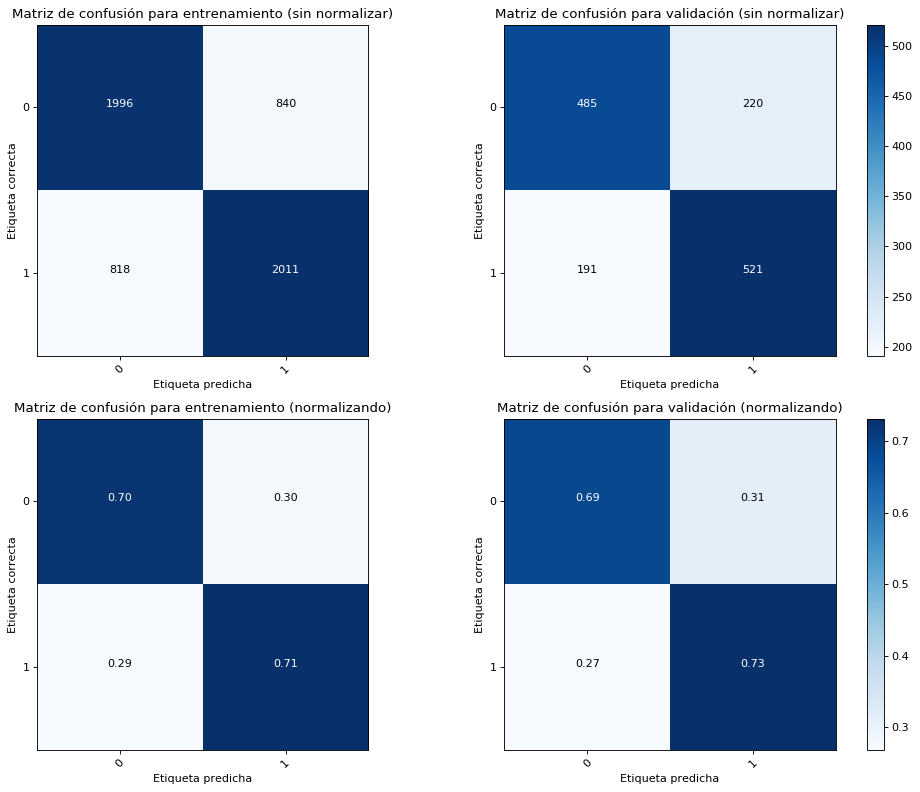

In [28]:

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1],
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1],
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()


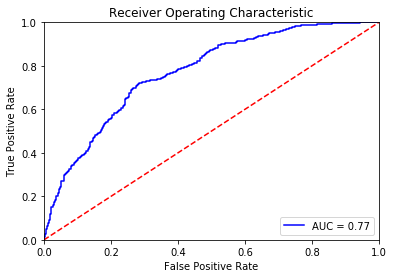

In [30]:
fpr, tpr, threshold = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### II.B. Dataset Nivel Hogar

In [32]:
ds_shuff_hogar = shuffle(ds_hogar)

y = ds_shuff_hogar.Target
ds_shuff_hogar.drop(columns=["Id","monthly_rent","idhogar", "Target"], inplace=True)
X = ds_shuff_hogar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### 1. Perceptron

A continuación se aplicará un clasificador Perceptrón.

In [225]:
# En principio, pueden utilizar el módulo que sigue, con los parámetros por defecto y los que definan a continuación:
penalty =  "l1"
alpha = 0.03
max_iter = 1000
tol = 1e-3

model = Perceptron(penalty = penalty, alpha = alpha, fit_intercept=True, max_iter = max_iter, tol = tol, shuffle=True, random_state=0, class_weight=None, warm_start=False)
model.fit(X_train, y_train)

Perceptron(alpha=0.03, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty='l1', random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [226]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.71
Exactitud del algoritmo para conjunto de validación: 0.70


### 2. K-NN

A continuación se aplicará un clasificador K-NN.

In [227]:
n_neighbors =  5# TODO: Cantidad de vecinos a tener en cuenta
metric =  "cosine"# TODO: Medida de distancia. Algunas opciones: cosine, euclidean, manhattan.

model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cosine',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [228]:
# Se calcula la exactitud para ambos conjuntos, train y test:

y_pred_train = model.predict(X_train)  # Obtenemos las predicciones para conjunto de entrenamiento (como 0 o 1)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Exactitud del algoritmo para conjunto de entrenamiento: %.2f" % accuracy_train)

y_pred_test = model.predict(X_test)  # Obtenemos las predicciones para conjunto de validación (como 0 o 1)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Exactitud del algoritmo para conjunto de validación: %.2f" % accuracy_test)

Exactitud del algoritmo para conjunto de entrenamiento: 0.78
Exactitud del algoritmo para conjunto de validación: 0.70


### 3. Regresión Logística

A continuación se aplicará un clasificador con regresión logística.

In [33]:
penalty = "l2"   # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha = 0.003  # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.
max_iter = 1000  # TODO: Cantidad máxima de iteraciones del algoritmo.
tol = 0.0001  # TODO: Precisión del algoritmo (error mínimo entre una iteración y la siguiente).

model = LogisticRegression(penalty=penalty, C=1./alpha, max_iter=max_iter, tol=tol)
model.fit(X_train, y_train)

/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=333.3333333333333, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Se calcula la exactitud para ambos conjuntos, train y test:

print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))

Exactitud para entrenamiento: 0.77
Exactitud para validación: 0.77


### 4. Selección del Modelo

#### 4.1. Selección y Descripción de Hipótesis

Describir el problema y la hipótesis del modelo.

#### 4.2. Selección de Regularizador

 ¿Utilizarán algún regularizador?¿Cuál?

#### 4.3. Selección de Función de Costo

¿Cuál será la función de costo utilizada?

#### 4.4. Justificación de las Selecciones

A continuación, se justifican las elecciones previas.

### 5. Selección de Parámetros y Métricas Sobre el Conjunto de Evaluación

Para la selección de hiperparámetros, pueden utilizar GridSearch. Además, deben calcular las métricas solicitadas.

# Logistic Regression

In [59]:
exploring_params = {
    "penalty":["l1", "l2"],
    'C': [0.5, 1, 2, 5, 10, 20, 100, 200], # Inversa del coeficiente de regularización
    'max_iter': [1000, 5000, 10000],  # Cantidad de iteraciones
    'tol': [0.005, 0.002, 0.001, 0.0001]  # Precisión del algoritmo
}

m = LogisticRegression(n_jobs=-1)
model = GridSearchCV(m, exploring_params, cv=3,n_jobs=-1, verbose=2, scoring='roc_auc')
model.fit(X_train, y_train)
    
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
y_true, y_pred = y_test, model.predict(X_test)
y_score = model.decision_function(X_test)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   11.8s


Mejor conjunto de parámetros:
{'C': 0.5, 'max_iter': 5000, 'penalty': 'l1', 'tol': 0.005}

Puntajes de la grilla:

Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):



[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   19.7s finished
/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [61]:
print(model.best_estimator_)
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_true, y_pred), end="\n\n")

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='warn', n_jobs=-1, penalty='l1',
                   random_state=None, solver='warn', tol=0.005, verbose=0,
                   warm_start=False)
Exactitud para entrenamiento: 0.77
Exactitud para validación: 0.77
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       234
           1       0.78      0.71      0.74       200

    accuracy                           0.77       434
   macro avg       0.78      0.77      0.77       434
weighted avg       0.77      0.77      0.77       434




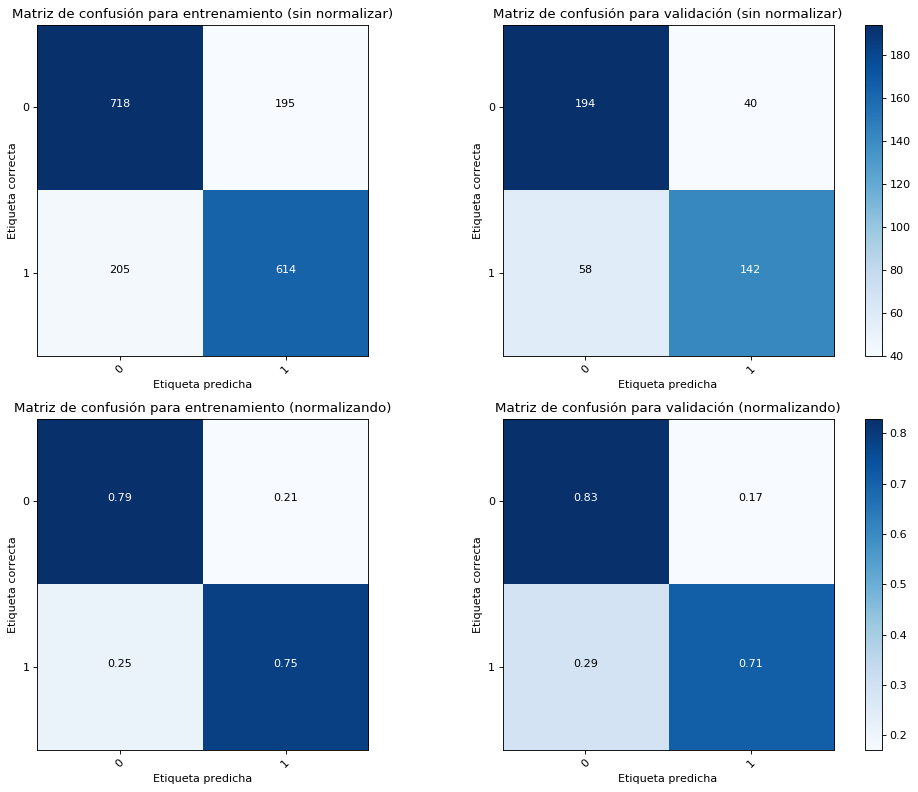

In [62]:

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1],
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1],
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

Text(0.5, 0, 'False Positive Rate')

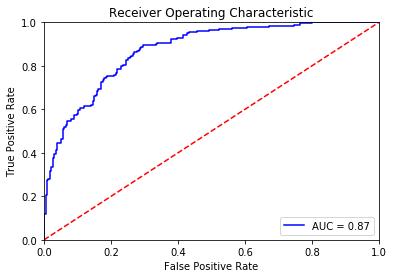

In [63]:
fpr, tpr, threshold = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic Logistic Regresion')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# SDG Classifier

In [48]:
# Para la búsqueda de los mejores parámetros, por ejemplo de logistic regression, pueden usar:

#el de logistic regressión predijo mejor los de 0, este predice mejor los de 1

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber", "perceptron"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1, 1, 2],
    "eta0":[0.0001, 0.001, 0.01, 0.1, 1],
    "learning_rate" : ["optimal", "constant", "invscaling", "adaptive"],
    "penalty" : ["l2", "l1", "none"],
}

m = SGDClassifier(max_iter=1000, random_state=42, n_jobs=-1, verbose=2)
model = GridSearchCV(m, params, cv=3,n_jobs=-1, verbose=2, scoring='roc_auc')
model.fit(X_train, y_train)
    
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print("Reporte de clasificación para el mejor clasificador (sobre conjunto de evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
y_score = model.decision_function(X_test)

Fitting 3 folds for each of 1800 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed:  3.2min


-- Epoch 1
Norm: 0.40, NNZs: 108, Bias: 0.036609, T: 1732, Avg. loss: 0.598781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 108, Bias: 0.058510, T: 3464, Avg. loss: 0.550609
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.70, NNZs: 108, Bias: 0.075061, T: 5196, Avg. loss: 0.531457
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.78, NNZs: 108, Bias: 0.080057, T: 6928, Avg. loss: 0.526938
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.84, NNZs: 108, Bias: 0.088211, T: 8660, Avg. loss: 0.523879
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.89, NNZs: 108, Bias: 0.097805, T: 10392, Avg. loss: 0.520914
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.92, NNZs: 108, Bias: 0.100044, T: 12124, Avg. loss: 0.519844
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.95, NNZs: 108, Bias: 0.104662, T: 13856, Avg. loss: 0.515285
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.98, NNZs: 108, Bias: 0.105646, T: 15588, Avg. loss: 0.514707
Total

[Parallel(n_jobs=-1)]: Done 5400 out of 5400 | elapsed:  3.5min finished


In [49]:
print(model.best_estimator_)
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_true, y_pred), end="\n\n")

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='adaptive', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)
Exactitud para entrenamiento: 0.76
Exactitud para validación: 0.77
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       234
           1       0.77      0.70      0.73       200

    accuracy                           0.77       434
   macro avg       0.77      0.76      0.76       434
weighted avg       0.77      0.77      0.77       434




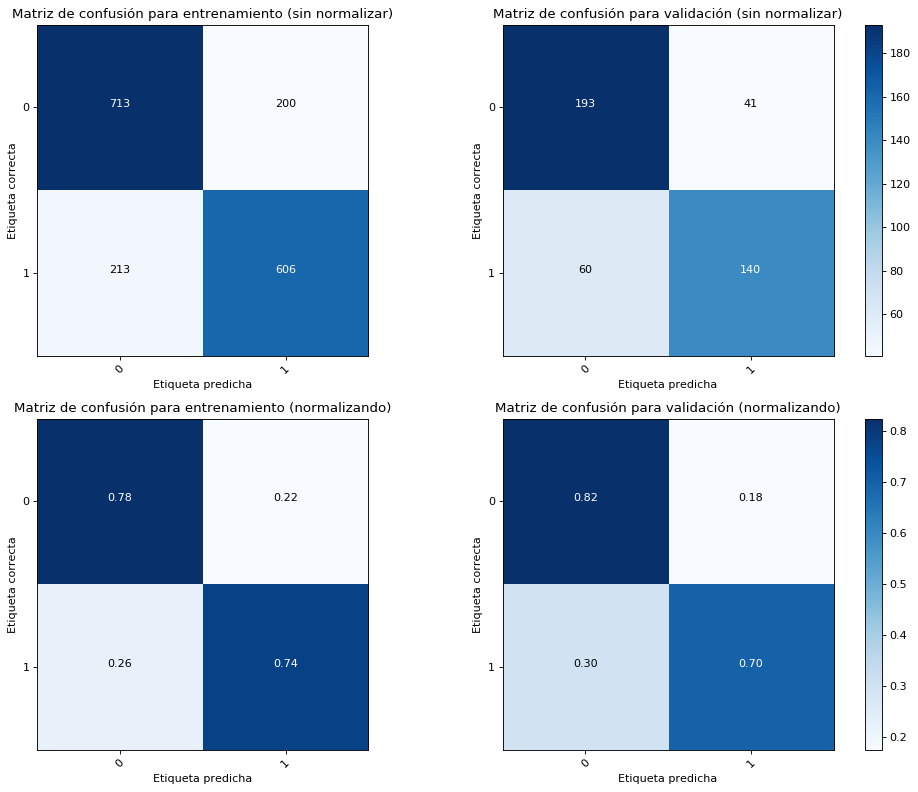

In [50]:

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1],
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1],
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

Text(0.5, 0, 'False Positive Rate')

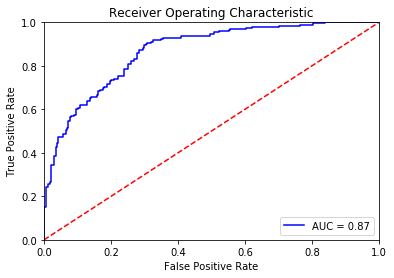

In [51]:
fpr, tpr, threshold = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Random Forest

In [94]:
params = { 
    "criterion" : [ "entropy"], 
    "min_samples_leaf" : [1, 2, 5, 10], 
    "min_samples_split" : [ 2, 5, 10, 12], 
    "n_estimators": [700],
    "max_depth": [20, 30, 40],
    "max_leaf_nodes": [50],
}

m = RandomForestClassifier( random_state=42, n_jobs=-1)
model = GridSearchCV(m, params, cv=5,n_jobs=-1, verbose=2, scoring='roc_auc')
model.fit(X_train, y_train)
    
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print(model.best_estimator_)
y_true, y_pred = y_test, model.predict(X_test)

y_score = model.predict_proba(X_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


Mejor conjunto de parámetros:
{'criterion': 'entropy', 'max_depth': 20, 'max_leaf_nodes': 50, 'min_samples_leaf': 2, 'min_samples_split': 12, 'n_estimators': 700}

Puntajes de la grilla:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [95]:
print(model.best_estimator_)
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_true, y_pred), end="\n\n")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features='auto', max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Exactitud para entrenamiento: 0.82
Exactitud para validación: 0.74
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       234
           1       0.73      0.71      0.72       200

    accuracy                           0.74       434
   macro avg       0.74      0.74      0.74       434
weighted avg       0.74      0.74      0.74       434




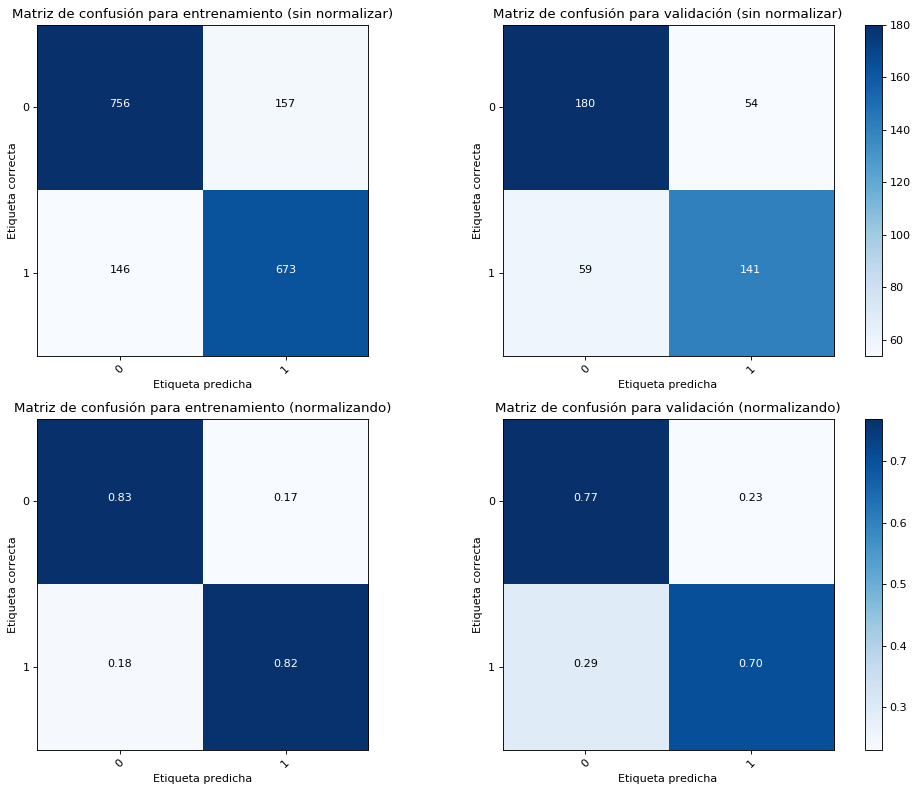

In [73]:

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1],
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1],
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

Text(0.5, 0, 'False Positive Rate')

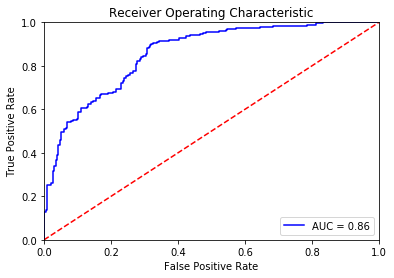

In [74]:
fpr, tpr, threshold = roc_curve(y_true, y_score[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# SVM

In [90]:
params = {
    'C': [0.5, 1, 2, 5, 10, 20, 100, 200], # Inversa del coeficiente de regularización
    "kernel":["rbf", "sigmoid"],
    'max_iter': [100, 500, 1000],  # Cantidad de iteraciones
    'tol': [0.005, 0.002, 0.001, 0.0001]  # Precisión del algoritmo
}

m = SVC( random_state=42)
model = GridSearchCV(m, params, cv=3,n_jobs=-1, verbose=2, scoring='roc_auc')
model.fit(X_train, y_train)
    
print("Mejor conjunto de parámetros:")
print(model.best_params_, end="\n\n")
print("Puntajes de la grilla:", end="\n\n")
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']
print(model.best_estimator_)
y_true, y_pred = y_test, model.predict(X_test)

y_score = model.decision_function(X_test)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed:   15.9s finished
/home/mariano/.virtualenvs/scikit/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mejor conjunto de parámetros:
{'C': 1, 'kernel': 'rbf', 'max_iter': 1000, 'tol': 0.002}

Puntajes de la grilla:

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=42,
    shrinking=True, tol=0.002, verbose=False)


In [91]:
print(model.best_estimator_)
print('Exactitud para entrenamiento: %.2f' %  accuracy_score(y_train, model.predict(X_train)))
print('Exactitud para validación: %.2f' % accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_true, y_pred), end="\n\n")

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=42,
    shrinking=True, tol=0.002, verbose=False)
Exactitud para entrenamiento: 0.78
Exactitud para validación: 0.76
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       234
           1       0.76      0.71      0.73       200

    accuracy                           0.76       434
   macro avg       0.76      0.76      0.76       434
weighted avg       0.76      0.76      0.76       434




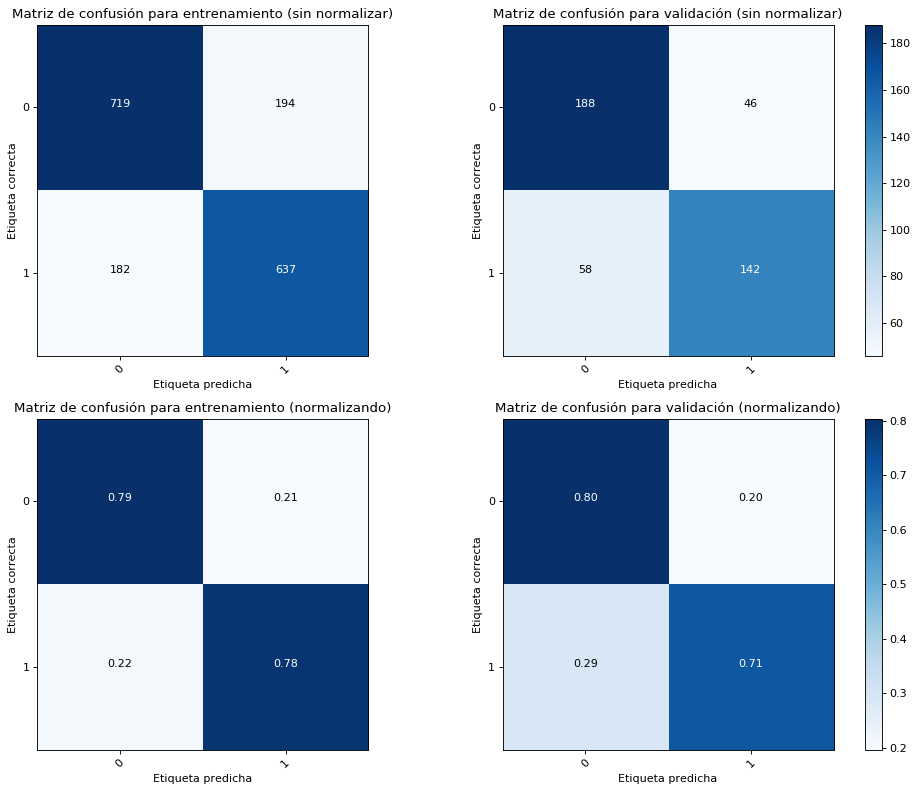

In [92]:

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1],
                      title='Matriz de confusión para entrenamiento (sin normalizar)')
plt.subplot(2, 2, 3)
plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para entrenamiento (normalizando)')

plt.subplot(2, 2, 2)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1],
                      title='Matriz de confusión para validación (sin normalizar)')
plt.subplot(2, 2, 4)
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)),
                      classes=[0, 1], normalize=True,
                      title='Matriz de confusión para validación (normalizando)')

plt.show()

Text(0.5, 0, 'False Positive Rate')

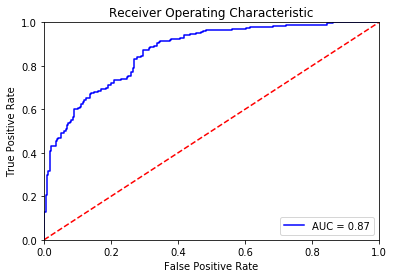

In [93]:
fpr, tpr, threshold = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')